In [ ]:
# TODO popuniti kodom za problem 2a

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving bottle.csv to bottle.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['bottle.csv']), low_memory=False)
data = df[["Salnty", "T_degC"]].dropna().iloc[:700]

In [ ]:
def create_design_matrix(x, degree):
    return np.vander(x, N=degree + 1, increasing=True)

def fit_polynomial_regression(X, y):
    return np.linalg.pinv(X.T @ X) @ X.T @ y

def predict(X, theta):
    return X @ theta

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [ ]:
x = data["Salnty"].values
y = data["T_degC"].values

In [ ]:
x_plot = np.linspace(np.min(x), np.max(x), 300)
mse_list = []

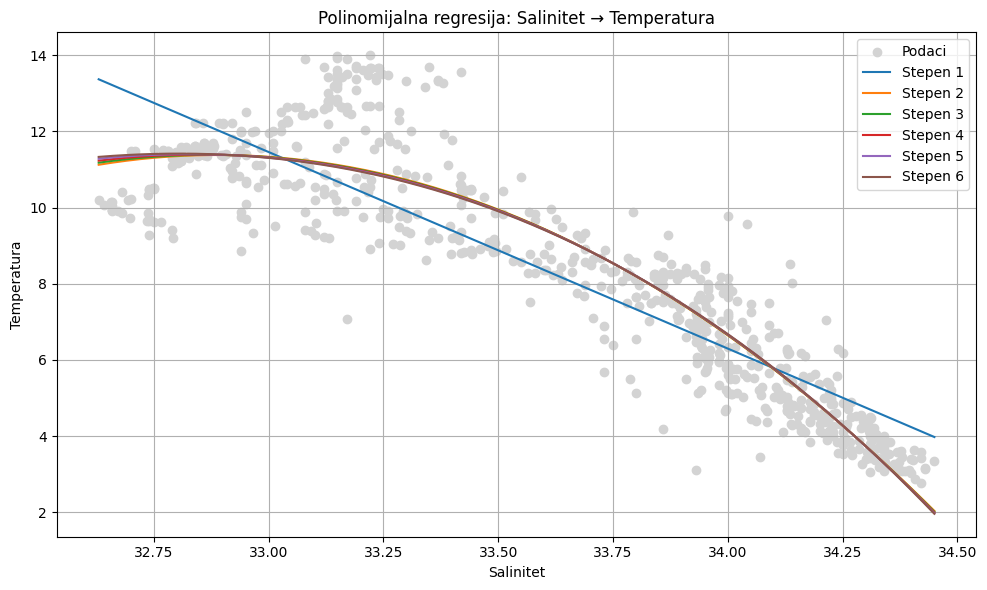

In [ ]:
# Prvi grafikon: podaci i regresione krive
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color="lightgray", label="Podaci")

for degree in range(1, 7):
    X_train = create_design_matrix(x, degree)
    theta = fit_polynomial_regression(X_train, y)

    X_plot = create_design_matrix(x_plot, degree)
    y_plot = predict(X_plot, theta)
    plt.plot(x_plot, y_plot, label=f"Stepen {degree}")

    y_pred = predict(X_train, theta)
    mse = mean_squared_error(y, y_pred)
    mse_list.append(mse)

plt.title("Polinomijalna regresija: Salinitet → Temperatura")
plt.xlabel("Salinitet")
plt.ylabel("Temperatura")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

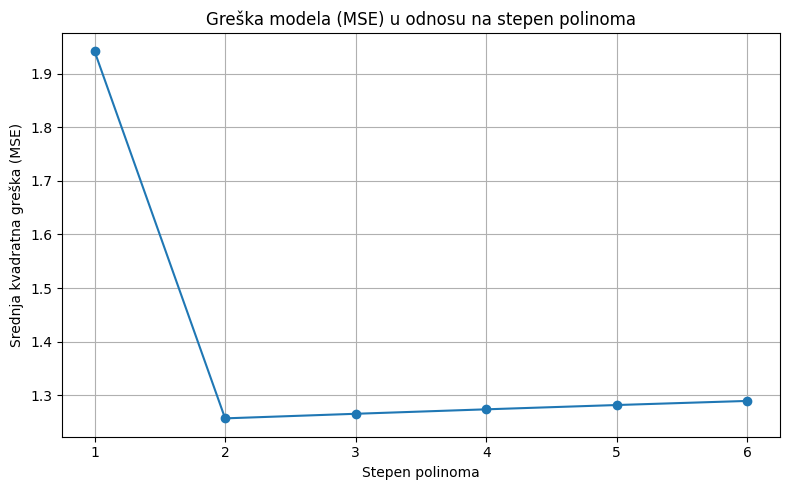

In [ ]:
# Drugi grafikon: MSE u odnosu na stepen polinoma
plt.figure(figsize=(8, 5))
plt.plot(range(1, 7), mse_list, marker="o")
plt.title("Greška modela (MSE) u odnosu na stepen polinoma")
plt.xlabel("Stepen polinoma")
plt.ylabel("Srednja kvadratna greška (MSE)")
plt.grid(True)
plt.tight_layout()
plt.show()

Kako se stepen polinoma povećava, model sve bolje prati podatke, pa se srednja kvadratna greška (MSE)
značajno smanjuje na početku (naročito od stepena 1 ka 2), što ukazuje da linearni model nije dovoljan
da opiše odnos saliniteta i temperature.

Međutim, već od stepena 2 pa nadalje, greška se menja vrlo malo. To znači da veći stepeni
ne donose značajna poboljšanja ali mogu da učine model kompleksnijim i potencijalno sklonijim
prenaučavanju (overfitting).

Zato bismo u praksi mogli izabrati stepen 2 ili 3 kao optimalan, jer nude dobar balans između
tačnosti i jednostavnosti modela.